# **Objectif**
L’objectif de ce travail pratique est d’évaluer et comparer les performances de différentes architectures de réseaux de neurones convolutifs (CNN 2D et CNN 3D) pour la classification d’images hyperspectrales.
Plus précisément, ce TP vise à :

- Concevoir, entraîner et évaluer des modèles CNN 2D et CNN 3D adaptés à ce type de données.

- Comparer les performances des deux approches en termes de précision (accuracy), de score F1 et de temps d’exécution.

- Analyser l’impact de la complexité des modèles et de la taille du jeu de données sur la généralisation et la stabilité d’apprentissage.

# Convolutional Neural Network 2D

Nous avons choisi d’utiliser un réseau de neurones convolutif 2D (2D CNN) comme premier modèle pour l’analyse d’images hyperspectrales des jeux de données Indian Pines et Pavia University, pour plusieurs raisons :

Structure spatiale des données : Les images hyperspectrales contiennent une structure spatiale locale (les pixels voisins partagent des informations) que les CNN exploitent efficacement à travers les filtres de convolution.

Réduction de la dimension spectrale : Les données hyperspectrales ont plusieurs dizaines (voire centaines) de bandes spectrales. Afin de réduire cette complexité, nous avons appliqué une PCA :

Pour Indian Pines : 27 composantes principales conservées.

Pour Pavia University : 3 composantes principales. Cela permet de réduire la dimension spectrale tout en conservant l'information essentielle.

Simplicité et efficacité : Le 2D CNN est un modèle relativement simple, rapide à entraîner, et performant pour des tâches de classification spatiale — un excellent point de départ avant d’aller vers des architectures plus complexes comme les 3D CNN.

***Architecture du modèle 2D CNN***

# Le modèle utilisé suit une architecture classique de convolution 2D :

- Entrée : des patches d’image de taille 5×5×C (où C est le nombre de bandes spectrales).

- Couche Convolutionnelle 1 : une convolution 2D avec 32 filtres, suivie d’une activation ReLU.

- Couche Convolutionnelle 2 : une seconde convolution 2D avec 64 filtres, suivie également d’une activation ReLU.

- Pooling : un pooling adaptatif (moyenne) qui réduit la dimension spatiale à 1×1.

- Flatten : les sorties convolutives sont aplaties en un vecteur de taille 64.

- Couche Fully Connected 1 : une couche dense de 128 neurones avec activation ReLU.

- Couche Fully Connected 2 (Sortie) : une couche dense finale qui projette sur l’espace des classes cibles.

- Sortie du modèle : un vecteur de scores (logits) pour chaque classe, utilisé pour la classification.

***Interprétation des résultats***

***Pavia University***

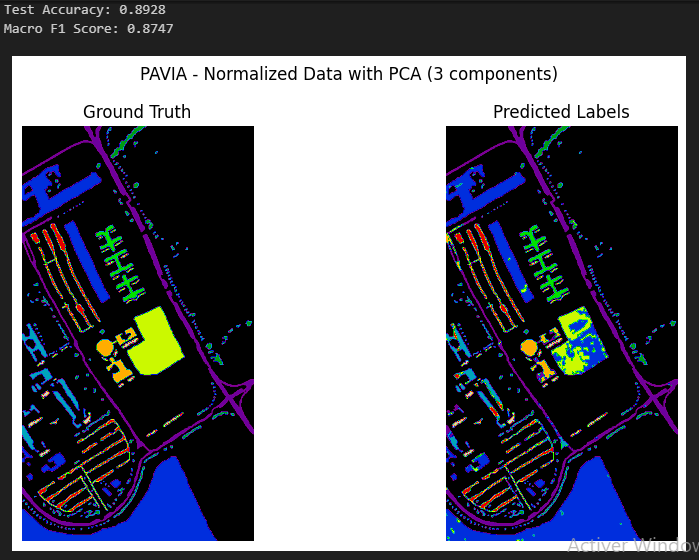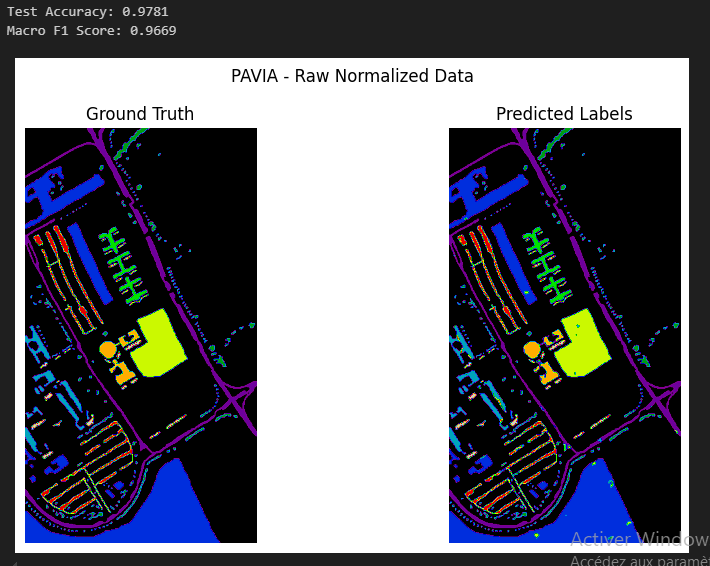

## Indian Pines

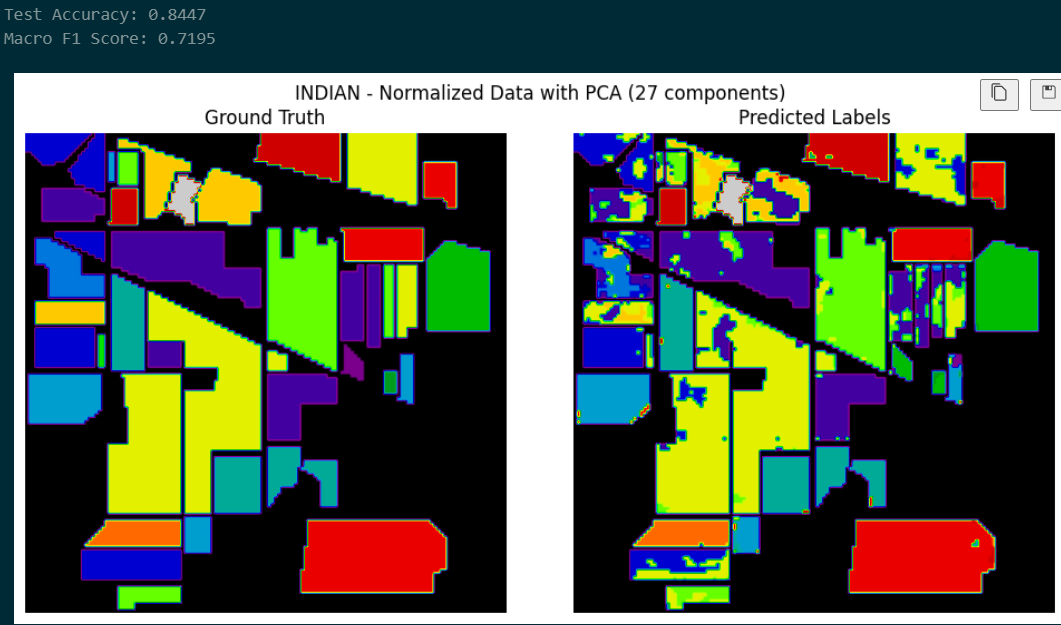

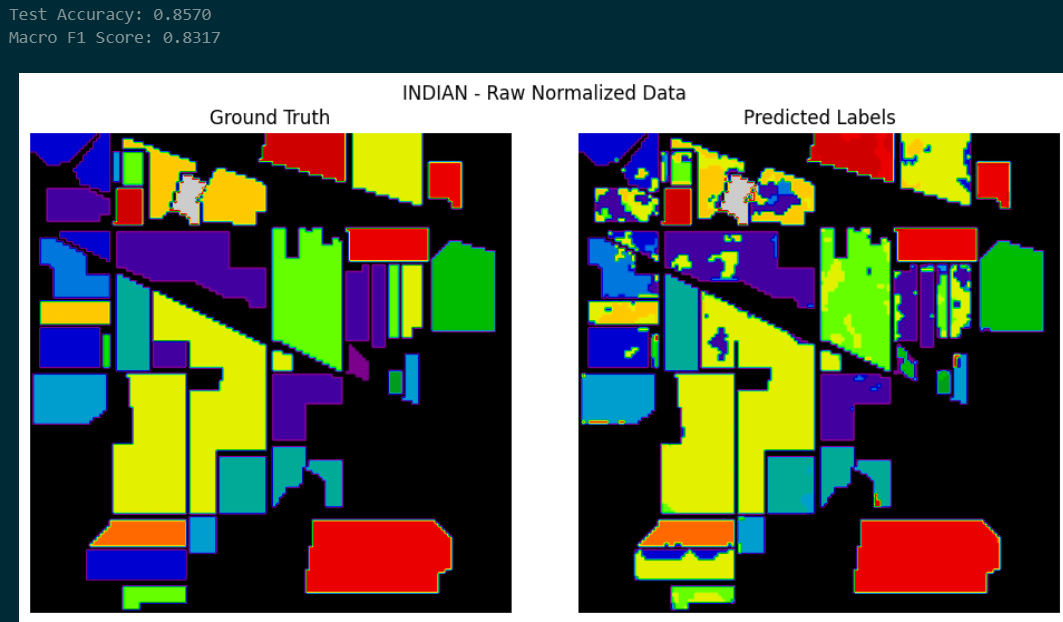

##  Scène : Pavia University

###  Observations – CNN 2D

####  Données Normalisées (Sans PCA) 
- Très bonne correspondance visuelle avec la vérité terrain.
- **Contours nets**, peu de bruit.
- Les grandes classes comme :
  - **Meadows** (vert clair),
  - **Asphalt** (bleu clair),
  - **Self-Blocking Bricks** (rose clair),
  - **Bare Soil** (marron clair)
  → sont bien distinguées.
- Bonne exploitation des caractéristiques **spatiales et spectrales**.

####  Données avec PCA (3 composantes) 
- Prédictions plus **bruitées**, moins précises.
- Confusion visuelle entre certaines classes (notamment dans les zones de bâtiments et de sols).
- Mauvaise classification de certaines zones (ex : **Meadows** → zones bleues intrusives).
- **Perte d'information discriminante** à cause de la réduction dimensionnelle.

###  Interprétation – CNN 2D sur Pavia
- Le CNN 2D est **très performant avec les données brutes** : bonne généralisation, précision élevée.
- La PCA, bien qu'utile pour réduire la complexité, **impacte négativement les performances**.
- **Classes minoritaires** comme *Shadows* ou *Bitumen* sont plus affectées par le bruit.
- **Classes dominantes** restent bien détectées, même après PCA.

##  Scène : Indian Pines

###  Observations – CNN 2D

####  Données Normalisées 
- **Accuracy : 0.8570**, **Macro F1 : 0.8317**
- Excellente cohérence avec la vérité terrain.
- Bonne différenciation, peu de bruit.
- Les grandes classes sont bien capturées.

####  Données avec PCA (27 composantes) 
- **Accuracy : 0.8447**, **Macro F1 : 0.7195**
- Légère baisse de performance, surtout en F1.
- Moins bonne reconnaissance des classes rares.
- PCA a supprimé certaines informations spectrales subtiles.

###  Interprétation – CNN 2D sur Indian Pines
- Le CNN 2D **explore efficacement les caractéristiques spectro-spatiales**.
- La **PCA pénalise** légèrement les classes sous-représentées :
  - *Grass-pasture-mowed* (28)
  - *Oats* (20)
  - *Alfalfa* (46)
- **Classes majoritaires** (e.g. *Soybean-mintill*, *Corn-notill*) → bien détectées.

# Choix du modèle 3D CNN

Après avoir utilisé un modèle 2D CNN, nous avons choisi d’explorer également un modèle 3D CNN pour analyser les jeux de données Indian Pines et Pavia University. Cette décision repose sur la nature même des images hyperspectrales, qui contiennent une grande quantité d’informations spectrales pour chaque pixel. Contrairement aux images classiques en 2D (avec seulement 3 canaux : rouge, vert, bleu), les images hyperspectrales contiennent des dizaines voire des centaines de bandes spectrales, ce qui crée une structure naturellement tridimensionnelle : deux dimensions spatiales (x, y) et une dimension spectrale (z).

Lors de la dernière séance, nous avons appliqué une analyse en composantes principales (ACP / PCA) pour réduire la dimension spectrale tout en conservant l’essentiel de l’information. Cette réduction nous a permis de conserver 27 composantes principales pour Indian Pines et 3 composantes pour Pavia University, ce qui justifie d'autant plus l’intérêt d’un traitement volumique avec une CNN 3D. En effet, une 3D CNN est capable d’extraire conjointement des caractéristiques spatiales et spectrales, ce qui peut améliorer la performance de la classification dans ce type de données.

## Architecture d’un 3D CNN
L’architecture d’un réseau CNN 3D est similaire à celle d’un CNN 2D, à la différence que les filtres de convolution glissent dans trois dimensions. Concrètement, cela signifie que les kernels traitent simultanément l’information spatiale et spectrale, ce qui permet au réseau de capturer des motifs plus complexes. Une architecture typique inclut :

Des convolutions 3D, suivies de fonctions d’activation (comme ReLU),

Des couches de pooling 3D pour réduire la dimensionnalité tout en conservant les caractéristiques importantes,

Et enfin des couches entièrement connectées pour la classification.

## Pourquoi c’est une bonne idée pour notre cas
Le choix du 3D CNN est particulièrement pertinent dans notre contexte, car il permet de tirer profit de la richesse spectrale des données hyperspectrales tout en tenant compte de la structure spatiale locale. Contrairement au 2D CNN qui ne traite que les images projetées sur une ou quelques bandes spectrales (ou composantes principales), le 3D CNN traite un cube de données, ce qui peut conduire à une meilleure capacité de généralisation et potentiellement à une meilleure précision en classification. En résumé, le 3D CNN est un bon candidat pour capturer la complexité des données hyperspectrales que nous étudions.


# Analyse des résultats avec et sans PCA
Pour les deux jeux de données — Pavia University et Indian Pines —, nous avons comparé les performances du modèle 3D CNN sur les données normalisées brutes ainsi que sur les données réduites via PCA.

##Pavia University
Sans PCA (données normalisées brutes), nous avons obtenu une accuracy de 79,32 % et un macro F1 score de 65,56 %.

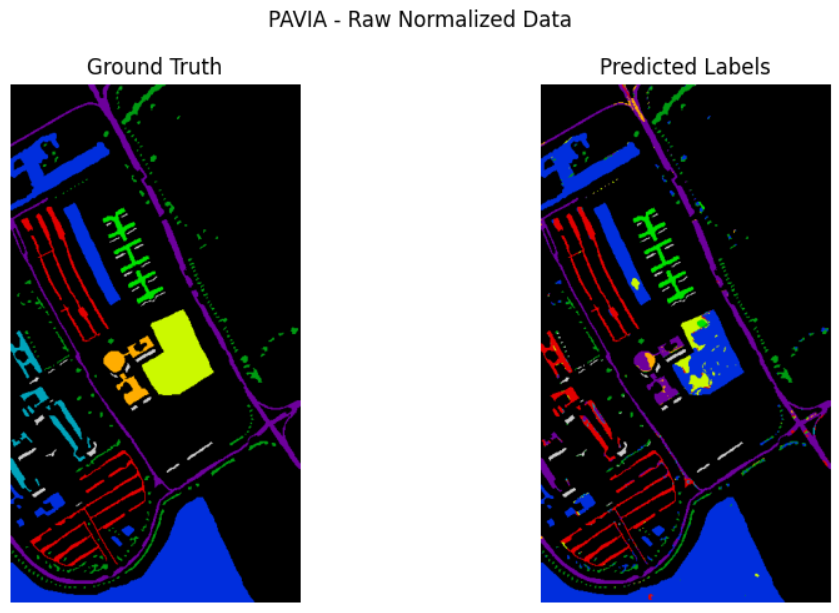



Avec PCA (réduction à 3 composantes principales), l’accuracy est montée à 87,06 % avec un macro F1 score de 85,42 %.

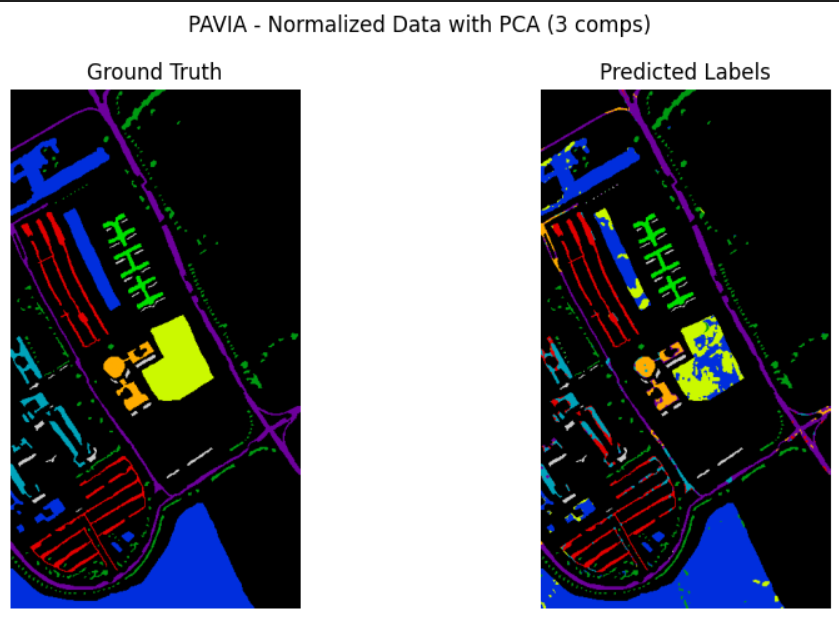


Les cartes de prédictions montrent également une nette amélioration avec la version PCA : les contours des classes sont plus précis, et les zones confondues sont moins fréquentes. Cela peut s’expliquer par le fait que sur ce jeu de données, les premières composantes PCA retiennent suffisamment d’information discriminante pour bien séparer les classes.





## Indian Pines

Sans PCA, l’accuracy était de 44,30 % avec un macro F1 de 19,51 %.

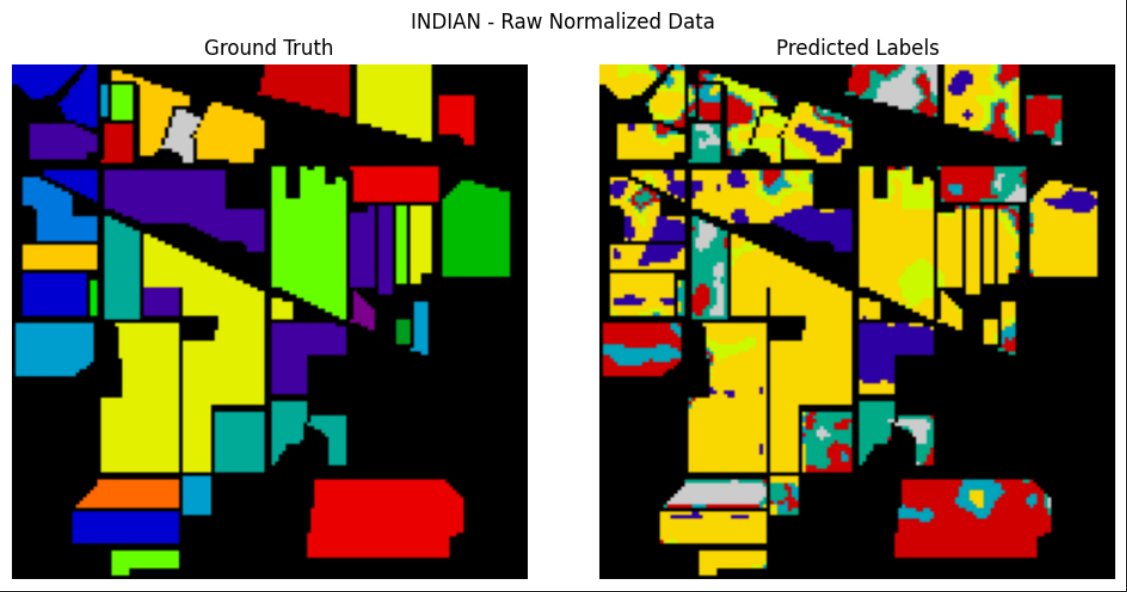

Avec PCA (réduction à 27 composantes principales), l’accuracy atteint 50,64 % et le macro F1 score monte légèrement à 23,52 %.

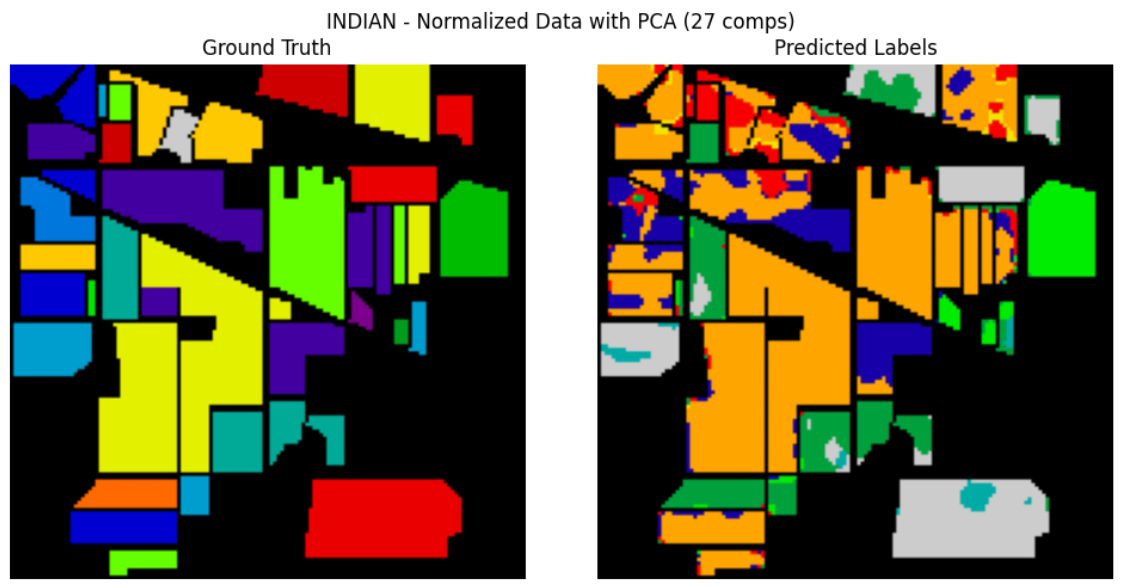


##  Observations – CNN 3D

####  Données Normalisées 
- **Accuracy : 0.4430**, **Macro F1 : 0.1951**
- La carte des prédictions montre une forte confusion entre plusieurs classes, avec des régions mal segmentées et des frontières floues.
- Visuellement, les prédictions semblent très bruitées, avec des motifs non cohérents par rapport à la vérité terrain.

####  Données avec PCA (27 composantes) 
- **Accuracy : 0.5064**, **Macro F1 : 0.2352**
- Légère amélioration par rapport aux données brutes : Moins de bruit aléatoire dans la carte.
- Quelques structures spatiales sont mieux préservées (grandes zones orange ou vertes par exemple).
Mais encore loin de performances satisfaisantes comparées au CNN 2D.

###  Interprétation – CNN 3D sur Indian Pines
- Faible performance du CNN 3D :
  - Peut-être dû à une architecture non optimisée.
  - Perte de détails spectraux critiques.
- Faible généralisation, surtout sur les classes rares.
- Comme vu précédemment, certaines classes sont fortement sous-représentées.
- Le CNN 3D n'arrive pas à bien généraliser pour ces classes, d’où la Macro F1 très faible (moins de 0.25), qui pénalise fortement les erreurs sur les petites classes.


# **Conclusion globale :**

**CNN 2D avec données normalisées (sans PCA)** donne les meilleurs résultats sur les deux scènes.
- **Réduction par PCA** peut être utile pour accélérer l'entraînement, mais au **détriment de la précision**, surtout sur les classes minoritaires.
- **CNN 3D nécessite une meilleure optimisation** ou davantage de données pour être performant.

##  Travaux futurs 

Suite aux performances observées, notamment les limites du CNN 3D sur les deux scènes hyperspectrales (*Indian Pines* et *Pavia University*), plusieurs axes d'amélioration sont proposés :

###  1. Optimisation de l'architecture CNN 3D
- **Réévaluation du design du modèle** :
  - Ajouter davantage de **couches convolutionnelles**.
  - Affiner les **tailles des filtres** (spatial et spectral).
- **Tester différentes profondeurs spectrales** :
  - Utiliser **15 ou 20 composantes principales via PCA** plutôt que 3 ou 27.
  - Trouver un **compromis entre perte d’information et complexité**.

###  2. Exploration de modèles hybrides
- **Combiner les avantages du CNN 2D et CNN 3D** :
  - Tester des **architectures hybrides** comme : `HybridSN` (CNN 3D + CNN 2D)

